Chapter 3

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from scipy import stats

In [2]:
Advertising = pd.read_csv('Advertising.csv')
Advertising = Advertising[['TV','radio','newspaper','sales']]

In [3]:
y = Advertising[['sales']]
n = max(y.shape)
x = Advertising[['TV']]
X = np.hstack((np.ones((n,1)),x))
beta = np.linalg.lstsq(X,y,rcond=None)[0]
yhat = np.matmul(X,beta)

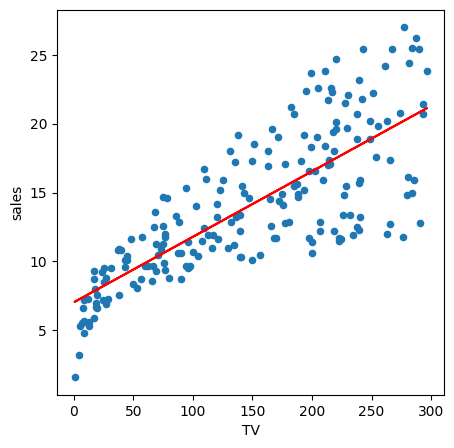

In [4]:
fig, axes = subplots(figsize=(5,5))
ax = Advertising.plot.scatter('TV', 'sales',ax=axes);
ax.plot(Advertising['TV'],yhat,'r');

LinregressResult(slope=0.04753664043301975, intercept=7.032593549127695, rvalue=0.7822244248616065, pvalue=1.4673897001946547e-42, stderr=0.0026906071877968703, intercept_stderr=0.4578429402734785)

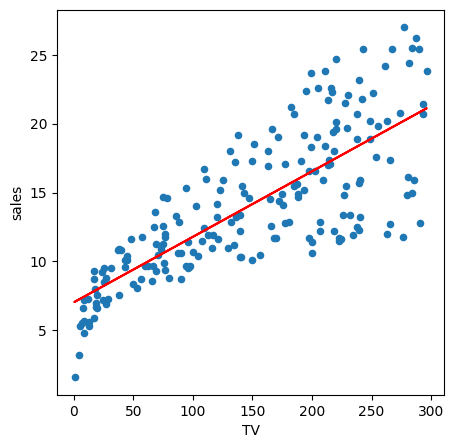

In [5]:
y = Advertising['sales']
x = Advertising['TV']
result = stats.linregress(x,y)
yhat=result.slope*x+result.intercept
fig, axes = subplots(figsize=(5,5))
ax = Advertising.plot.scatter('TV', 'sales',ax=axes);
ax.plot(Advertising['TV'],yhat,'r');
result

In [6]:
# 95% confidence intervals for beta0 and beta1 
print('95% confidence interval for the slope: ',[result.slope-2*result.stderr,result.slope+2*result.stderr])
print('95% confidence interval for the intercept: ',[result.intercept-2*result.intercept_stderr,result.intercept+2*result.intercept_stderr])
# t values for beta0 and beta1
print('t-values: ',[result.slope/result.stderr,result.intercept/result.intercept_stderr])
# R^2 value
print('R-squared value: ',result.rvalue**2)

95% confidence interval for the slope:  [0.04215542605742601, 0.05291785480861349]
95% confidence interval for the intercept:  [6.116907668580738, 7.948279429674652]
t-values:  [17.66762560087555, 15.360275174117547]
R-squared value:  0.6118750508500711


Multiple linear regression

In [7]:
y = Advertising[['sales']]
n = max(y.shape)
X = Advertising[['TV','radio','newspaper']]
p = min(X.shape)
X = np.hstack((np.ones((n,1)),X))
beta = np.linalg.lstsq(X,y,rcond=None)[0]
yhat = np.matmul(X,beta)

In [9]:
# Compute the standard errors, t-values, and the associated p-values
RSS = np.linalg.norm(y-yhat)**2
RSE = (RSS/(n-p-1))**(1/2)
StdErrs = np.diag(RSE**2*np.linalg.inv(np.matmul(X.transpose(),X)))**(1/2)
print('standard errors: ', StdErrs)
tvals = np.divide(beta.transpose(),StdErrs)
print('t-values: ', tvals)
pvals = 2*(1-stats.t.cdf(np.absolute(tvals),n-p-1,loc=0,scale=1))
print('p-values: ',pvals)

standard errors:  [0.31190824 0.0013949  0.00861123 0.00587101]
t-values:  [[ 9.42228844 32.80862443 21.89349606 -0.17671459]]
p-values:  [[0.         0.         0.         0.85991505]]


In [10]:
Advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [11]:
TSS = np.linalg.norm(y-y.mean())**2
R2 = (TSS-RSS)/TSS
print('R^2: ',R2)
F = ((TSS-RSS)/p)/(RSS/(n-p-1))
print('F-value: ',F)
pval = 1-stats.f.cdf(F,p,n-p-1)
print('p-value: ',pval)

R^2:  0.8972106381789521
F-value:  570.2707036590942
p-value:  1.1102230246251565e-16


In [11]:
# Compute F-statistic for removing the resulting single variable from the model F = t^2 (see footnote on p. 85)
F = tvals**2
pvals_F = 1-stats.f.cdf(F,1,n-p-1)
print('p-values for F stat, one varible removed: ',pvals_F)

p-values for F stat, one varible removed:  [[1.11022302e-16 1.11022302e-16 1.11022302e-16 8.59915050e-01]]


In [41]:
# Recompute statistics with X3=newspaper removed
y = Advertising[['sales']]
n = max(y.shape)
X = Advertising[['TV','radio']]
p = min(X.shape)
X = np.hstack((np.ones((n,1)),X))
beta = np.linalg.lstsq(X,y,rcond=None)[0]
yhat = np.matmul(X,beta)
RSS = np.linalg.norm(y-yhat)**2
RSE = (RSS/(n-p-1))**(1/2)
StdErrs = np.diag(RSE**2*np.linalg.inv(np.matmul(X.transpose(),X)))**(1/2)
print('standard errors: ', StdErrs)
tvals = np.divide(beta.transpose(),StdErrs)
print('t-values: ', tvals)
pvals = 2*(1-stats.t.cdf(np.absolute(tvals),n-p-1,loc=0,scale=1))
print('p-values: ',pvals)
TSS = np.linalg.norm(y-y.mean())**2
R2 = (TSS-RSS)/TSS
print('R^2: ',R2)

standard errors:  [0.29448968 0.00139036 0.00803997]
t-values:  [[ 9.91919285 32.90870826 23.38244601]]
p-values:  [[0. 0. 0.]]
R^2:  0.8971942610828956


Next, on to the Credit.csv data set

In [42]:
Credit = pd.read_csv('Credit.csv')
n = max(Credit.shape)
Credit

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,No,No,Yes,South,560
396,13.364,3838,296,5,65,17,No,No,No,East,480
397,57.872,4171,321,5,67,12,Yes,No,Yes,South,138
398,37.728,2525,192,1,44,13,No,No,Yes,South,0


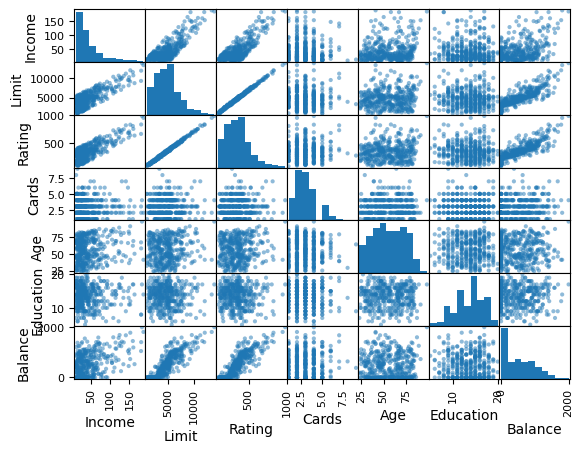

In [43]:
pd.plotting.scatter_matrix(Credit);

See if the amount of credit card debt you have is statistically different whether you own a home or not.

In [44]:
y = Credit[['Balance']]
X = np.ones((n,2))
indx_own = Credit['Own']=='Yes'
# beta_1 = 0 for the non-homeowners.
X[~indx_own,1]=0
beta = np.linalg.lstsq(X,y,rcond=None)[0]
print('mean balances : ', beta.transpose())
yhat = np.matmul(X,beta)
RSS = np.linalg.norm(y-yhat)**2
RSE = (RSS/(n-p-1))**(1/2)
StdErrs = np.diag(RSE**2*np.linalg.inv(np.matmul(X.transpose(),X)))**(1/2)
print('standard errors: ', StdErrs)
tvals = np.divide(beta.transpose(),StdErrs)
print('t-values: ', tvals)
pvals = 2*(1-stats.t.cdf(np.absolute(tvals),n-p-1,loc=0,scale=1))
print('p-values: ',pvals)

mean balances :  [[509.80310881  19.73312308]]
standard errors:  [33.16977357 46.10917266]
t-values:  [[15.36950826  0.42796524]]
p-values:  [[0.         0.66890849]]


See if the amount of credit card debt you have is statistically different depending upon the region you live in.

In [45]:
indx_west = Credit['Region']=='West'
indx_south = Credit['Region']=='South'
X = np.ones((n,3))
X[~indx_south,1]=0
X[~indx_west,2]=0
beta = np.linalg.lstsq(X,y,rcond=None)[0]
print('mean balances : ', beta.transpose())
yhat = np.matmul(X,beta)
RSS = np.linalg.norm(y-yhat)**2
RSE = (RSS/(n-p-1))**(1/2)
StdErrs = np.diag(RSE**2*np.linalg.inv(np.matmul(X.transpose(),X)))**(1/2)
print('standard errors: ', StdErrs)
tvals = np.divide(beta.transpose(),StdErrs)
print('t-values: ', tvals)
pvals = 2*(1-stats.t.cdf(np.absolute(tvals),n-p-1,loc=0,scale=1))
print('p-values: ',pvals)

mean balances :  [[531.         -12.50251256 -18.68627451]]
standard errors:  [46.31868298 56.68103815 65.02107494]
t-values:  [[11.46405653 -0.22057663 -0.28738797]]
p-values:  [[0.         0.82553549 0.77396522]]


It does not appear that credit card debt is dependent upon region in which you live. Let's do an F-test to verify this.

In [46]:
TSS = np.linalg.norm(y-y.mean())**2
p = 2;
F = ((TSS-RSS)/p)/(RSS/(n-p-1))
print('F-value: ',F)
pval = 1-stats.f.cdf(F,p,n-p-1)
print('p-value: ',pval)

F-value:  0.04344278304948626
p-value:  0.9574918881198965


Thus we fail to reject the null hypothesis, that beta1 and beta2 are both 0.

Let's return to the sales problem and look at the model including the interaction term $\beta_3 X_1 X_2$

In [47]:
y = Advertising[['sales']]
n = max(y.shape)
Advertising['TV*radio'] = Advertising.TV*Advertising.radio
X = Advertising[['TV','radio','TV*radio']]
p = min(X.shape)
X = np.hstack((np.ones((n,1)),X))
beta = np.linalg.lstsq(X,y,rcond=None)[0]
print('beta_hat = ',beta.transpose())
yhat = np.matmul(X,beta)
RSS = np.linalg.norm(y-yhat)**2
RSE = (RSS/(n-p-1))**(1/2)
StdErrs = np.diag(RSE**2*np.linalg.inv(np.matmul(X.transpose(),X)))**(1/2)
print('standard errors: ', StdErrs)
tvals = np.divide(beta.transpose(),StdErrs)
print('t-values: ', tvals)
pvals = 2*(1-stats.t.cdf(np.absolute(tvals),n-p-1,loc=0,scale=1))
print('p-values: ',pvals)
TSS = np.linalg.norm(y-y.mean())**2
R2 = (TSS-RSS)/TSS
print('R^2: ',R2)

beta_hat =  [[6.75022020e+00 1.91010738e-02 2.88603399e-02 1.08649470e-03]]
standard errors:  [2.47871370e-01 1.50414551e-03 8.90527286e-03 5.24203958e-05]
t-values:  [[27.23275465 12.69895347  3.24081478 20.72656418]]
p-values:  [[0.         0.         0.00140046 0.        ]]
R^2:  0.9677905498482523


This shows that the interaction term $X_1 X_2$ is signficant and so should be in the model. Note that the R^2 value increased from .897 to 0.968, which is significant.

Back to the Credit data set. This time will see how income effects credit card debt based on whether you are a student or not.

In [48]:
y = Credit[['Balance']]
n = y.shape[0]
p = 3
x0 = np.ones((n,1))
x1 = Credit[['Income']]
indx_student = Credit['Student']=='Yes'
x2 = np.ones((n,1))
x2[~indx_student]=0
x3 = np.multiply(x1,x2)
X = np.hstack((x0,x1,x2,x3))
beta = np.linalg.lstsq(X,y,rcond=None)[0]
print('mean balances : ', beta.transpose())
yhat = np.matmul(X,beta)
RSS = np.linalg.norm(y-yhat)**2
RSE = (RSS/(n-p-1))**(1/2)
StdErrs = np.diag(RSE**2*np.linalg.inv(np.matmul(X.transpose(),X)))**(1/2)
print('standard errors: ', StdErrs)
tvals = np.divide(beta.transpose(),StdErrs)
print('t-values: ', tvals)
pvals = 2*(1-stats.t.cdf(np.absolute(tvals),n-p-1,loc=0,scale=1))
print('p-values: ',pvals)

mean balances :  [[200.62315295   6.21816874 476.67584321  -1.99915087]]
standard errors:  [ 33.69837058   0.59209358 104.35122347   1.73125114]
t-values:  [[ 5.95349714 10.5020034   4.56799477 -1.15474342]]
p-values:  [[5.78965809e-09 0.00000000e+00 6.58609508e-06 2.48891851e-01]]


The p-value for the t-test for $\beta_3$ suggests that we may not be able to reject the null hypothesis, that $\beta_3=0$.

Nonlinear relationships

In [56]:
Auto = pd.read_csv('Auto.data',
                   na_values=['?'],
                   delim_whitespace=True)
Auto = Auto.dropna()
#Auto = pd.read_csv('Auto.csv')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


Try fitting a quadratice model: $y=\beta_0+\beta_1 x+\beta_2 x^2+\epsilon$

In [54]:
y = Auto[['mpg']]
n = y.shape[0]
x0 = np.ones((n,1))
x1 = Auto[['horsepower']]
x2 = Auto[['horsepower']]**2
X = np.hstack((x0,x1,x2))
beta = np.linalg.lstsq(X,y,rcond=None)[0]
print('mean balances : ', beta.transpose())
yhat = np.matmul(X,beta)
RSS = np.linalg.norm(y-yhat)**2
RSE = (RSS/(n-p-1))**(1/2)
StdErrs = np.diag(RSE**2*np.linalg.inv(np.matmul(X.transpose(),X)))**(1/2)
print('standard errors: ', StdErrs)
tvals = np.divide(beta.transpose(),StdErrs)
print('t-values: ', tvals)
pvals = 2*(1-stats.t.cdf(np.absolute(tvals),n-p-1,loc=0,scale=1))
print('p-values: ',pvals)

mean balances :  [[ 5.69000997e+01 -4.66189630e-01  1.23053610e-03]]
standard errors:  [1.80274545e+00 3.11647004e-02 1.22233076e-04]
t-values:  [[ 31.56302498 -14.9588998   10.06712866]]
p-values:  [[0. 0. 0.]]


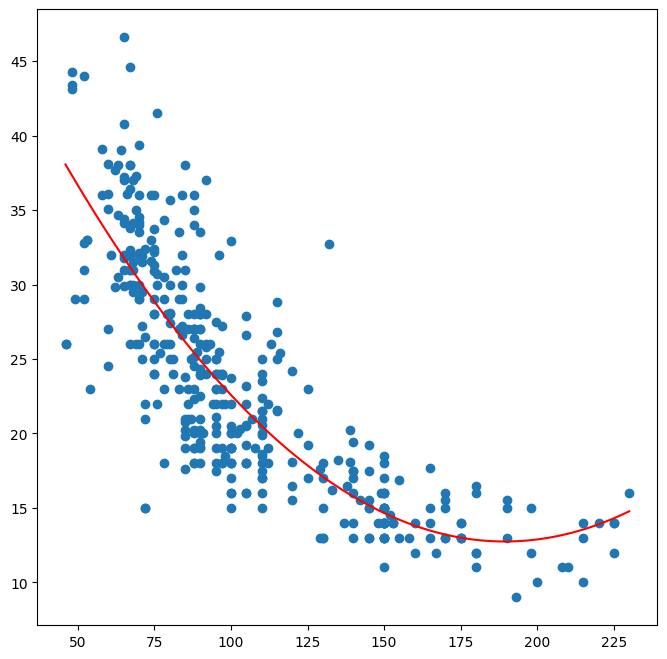

In [51]:
y = Auto[['mpg']]
x1 = Auto[['horsepower']]
fig, ax = subplots(figsize=(8,8))
ax.plot(x1,y,'o')
x1_grid = np.linspace(x1.min(),x1.max(),100)
yhat_grid = beta[0]+beta[1]*x1_grid+beta[2]*x1_grid**2
ax.plot(x1_grid,yhat_grid,'r')

We don't do much better if we increase to cubic, quartic, etc.

Colinearity

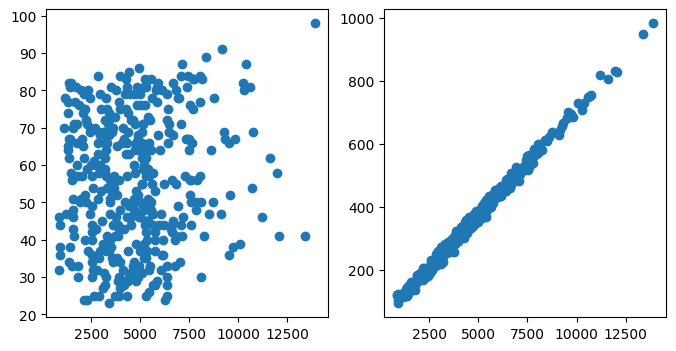

In [52]:
fig, ax = subplots(ncols=2, figsize=(8,4))
ax[0].plot(Credit['Limit'],Credit['Age'],'o')
ax[1].plot(Credit['Limit'],Credit['Rating'],'o')

The variance inflation factors for $\beta_1$, $\beta_2$ and $\beta_3$ are 1.01, 160.67 and 160.59, respetively